In [39]:
import re
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
seed(1)

import tensorflow
tensorflow.random.set_seed(1)

import requests
import io

def get_data(url):
    s=requests.get(url).content
    return pd.read_csv(io.StringIO(s.decode('utf-8')))


In [40]:
df = get_data("https://api.covid19india.org/csv/latest/state_wise_daily.csv")

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 40 columns):
Date      150 non-null object
Status    150 non-null object
TT        150 non-null int64
AN        150 non-null int64
AP        150 non-null int64
AR        150 non-null int64
AS        150 non-null int64
BR        150 non-null int64
CH        150 non-null int64
CT        150 non-null int64
DN        150 non-null int64
DD        150 non-null int64
DL        150 non-null int64
GA        150 non-null int64
GJ        150 non-null int64
HR        150 non-null int64
HP        150 non-null int64
JK        150 non-null int64
JH        150 non-null int64
KA        150 non-null int64
KL        150 non-null int64
LA        150 non-null int64
LD        150 non-null int64
MP        149 non-null float64
MH        150 non-null int64
MN        150 non-null int64
ML        150 non-null int64
MZ        150 non-null int64
NL        150 non-null int64
OR        150 non-null int64
PY        150 non-nul

In [42]:
df.head()

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB
0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,...,0,1,3,0,1,1,0,12,0,0
1,14-Mar-20,Recovered,9,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,4,0,0
2,14-Mar-20,Deceased,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,Confirmed,27,0,0,0,0,0,0,0,...,0,0,1,0,0,2,0,1,0,0
4,15-Mar-20,Recovered,4,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0


In [43]:
df = df[df['Status']=='Confirmed']

In [44]:
df.Date = pd.to_datetime(df.Date, format='%d-%b-%y')

In [45]:
df = df.drop(['Status'], axis=1)

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [48]:
df.reset_index()
df = df.set_index("Date")
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50 entries, 2020-03-14 to 2020-05-02
Data columns (total 38 columns):
TT    50 non-null int64
AN    50 non-null int64
AP    50 non-null int64
AR    50 non-null int64
AS    50 non-null int64
BR    50 non-null int64
CH    50 non-null int64
CT    50 non-null int64
DN    50 non-null int64
DD    50 non-null int64
DL    50 non-null int64
GA    50 non-null int64
GJ    50 non-null int64
HR    50 non-null int64
HP    50 non-null int64
JK    50 non-null int64
JH    50 non-null int64
KA    50 non-null int64
KL    50 non-null int64
LA    50 non-null int64
LD    50 non-null int64
MP    49 non-null float64
MH    50 non-null int64
MN    50 non-null int64
ML    50 non-null int64
MZ    50 non-null int64
NL    50 non-null int64
OR    50 non-null int64
PY    50 non-null int64
PB    50 non-null int64
RJ    50 non-null int64
SK    50 non-null int64
TN    50 non-null int64
TG    50 non-null int64
TR    50 non-null int64
UP    50 non-null int64
UT    50 no

In [49]:
df = df.cumsum()

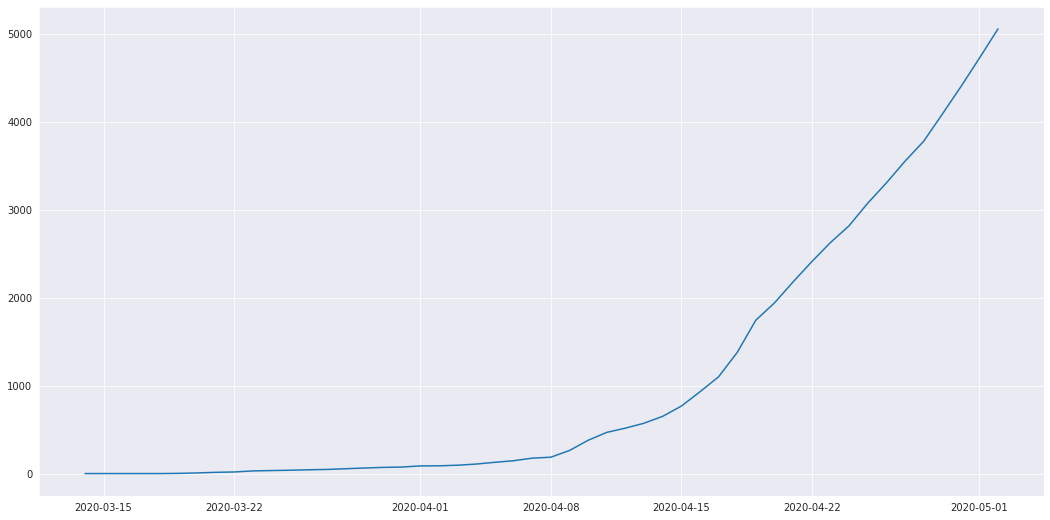

In [54]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df['GJ'], linestyle="-")
plt.show()

In [51]:
df = df[['GJ', 'UT']]

In [52]:
df = df.drop(['UT'], axis=1)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50 entries, 2020-03-14 to 2020-05-02
Data columns (total 1 columns):
GJ    50 non-null float64
dtypes: float64(1)
memory usage: 800.0 bytes


In [55]:
# split the data into train and test set
train_data = df[:len(df)-5]
test_data = df[len(df)-5:]

In [56]:
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [57]:
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [58]:
n_input = 20
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [59]:
lstm_model = Sequential()
#lstm_model.add(LSTM(200, activation='tanh', input_shape=(n_input, n_features)))
lstm_model.add(LSTM(110, activation='selu', input_shape=(n_input, n_features)))
#lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dropout(0.1))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='Adadelta', loss='mse', metrics=['accuracy'])#, learning_rate=0.01)
# lstm_model.compile(optimizer='Adamax', loss='mse', learning_rate=0.002, beta_1=0.9, beta_2=0.999)
#lstm_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

lstm_model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 110)               49280     
_________________________________________________________________
dropout_2 (Dropout)          (None, 110)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 111       
Total params: 49,391
Trainable params: 49,391
Non-trainable params: 0
_________________________________________________________________


In [60]:
lstm_model.fit_generator(generator,epochs=10)

Epoch 1/10
25/25 [==============================] - 4s 176ms/step - loss: 0.0443 - accuracy: 0.0400
Epoch 2/10
25/25 [==============================] - 1s 56ms/step - loss: 0.0033 - accuracy: 0.0400
Epoch 3/10
25/25 [==============================] - 1s 58ms/step - loss: 0.0036 - accuracy: 0.0400
Epoch 4/10
25/25 [==============================] - 1s 53ms/step - loss: 0.0066 - accuracy: 0.0400
Epoch 5/10
25/25 [==============================] - 1s 59ms/step - loss: 0.0043 - accuracy: 0.0400
Epoch 6/10
25/25 [==============================] - 1s 59ms/step - loss: 0.0032 - accuracy: 0.0400
Epoch 7/10
25/25 [==============================] - 2s 63ms/step - loss: 0.0066 - accuracy: 0.0400
Epoch 8/10
25/25 [==============================] - 2s 60ms/step - loss: 0.0042 - accuracy: 0.0400
Epoch 9/10
25/25 [==============================] - 1s 53ms/step - loss: 0.0047 - accuracy: 0.0400
Epoch 10/10
25/25 [==============================] - 1s 53ms/step - loss: 0.0070 - accuracy: 0.0400


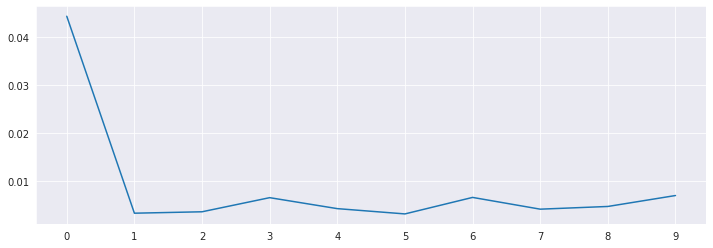

In [61]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [62]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]

In [63]:
current_batch = batch.reshape((1, n_input, n_features))

In [64]:
for i in range(8):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)


In [65]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions

array([[3978.24333525],
       [4201.6263628 ],
       [4422.90772915],
       [4637.91160393],
       [4841.10362673],
       [5029.20463085],
       [5201.67069674],
       [5358.93662167]])

In [66]:
test_data['Predicted_Confirmed_Cases'] = lstm_predictions[:5]
test_data

,GJ,Predicted_Confirmed_Cases
Date,,
2020-04-28,3774.0,3978.243335
2020-04-29,4082.0,4201.626363
2020-04-30,4395.0,4422.907729
2020-05-01,4721.0,4637.911604
2020-05-02,5054.0,4841.103627


In [68]:
from sklearn.metrics import mean_squared_error
import math
print('RMSE: ', math.sqrt(mean_squared_error(test_data['GJ'], test_data['Predicted_Confirmed_Cases'])))

from sklearn.metrics import mean_absolute_error
print('MAE: ', mean_absolute_error(test_data['GJ'], test_data['Predicted_Confirmed_Cases']))


RMSE:  147.67071160538876
MAE:  129.5524393081665


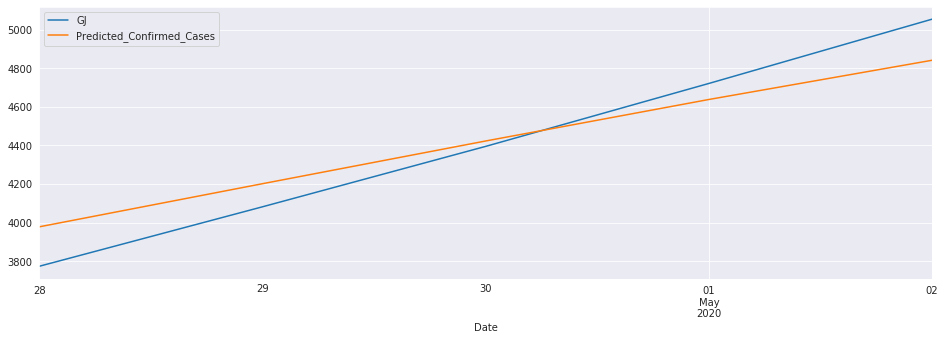

In [69]:
test_data['GJ'].plot(figsize = (16,5), legend=True)
test_data['Predicted_Confirmed_Cases'].plot(legend = True)